In [ ]:
# K-Nearest Neighbor (KNN)
#Supervised classification machine learning
#Lazy learner
  # Instance Based (you have to train it every time you run it)
  # Lazy because it does not try to learn a function from the training data (like the others)
  # it memorise the pattern from the dataset
# Non parametetric
  # Distribution free tests because no assumption of the data needing to follow a specific distribution
# Not efficient on big-data, very susceptible to overfitting

#Steps:
  # choose the number of k
  # select a distance metric
  # find the k nearest neighbours of the sample
  # assign the class label my majority vote



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X_train = df[['petal_length', 'petal_width']]
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [6]:
Xv = X_train.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1]:
xx

NameError: name 'xx' is not defined

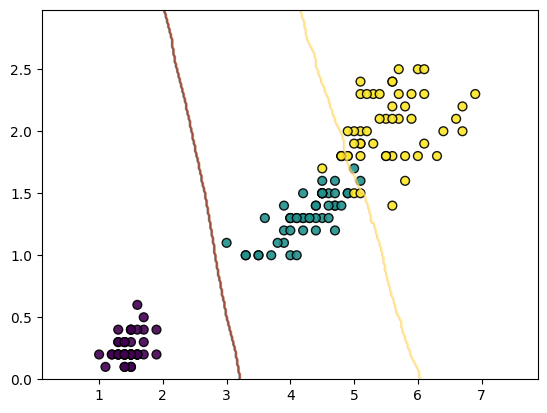

In [7]:
ax = plt.contour(xx,yy,Z,cmap='afmhot',alpha=0.3)
plt.scatter(X_train.values[:,0],X_train.values[:,1],c=y_train,s=40,alpha=0.9,edgecolors='k')

In [8]:
from google.colab import files
uploaded = files.upload()



Saving wdbc.data to wdbc.data


In [9]:
ls

sample_data/  wdbc.data


In [14]:
# Project Cancer Detection (KNN)
import numpy as np
import pandas as pd

col = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
df = pd.read_csv("breast-cancer-wisconsin.data",names=col,header=None)
df.head()

--2025-03-31 11:32:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘breast-cancer-wisconsin.data.1’

breast-cancer-wisco     [ <=>                ]  19.42K  --.-KB/s    in 0.02s   

2025-03-31 11:32:43 (1.17 MB/s) - ‘breast-cancer-wisconsin.data.1’ saved [19889]



,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
#Data Pre-processing
np.where(df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [17]:
df['Bare Nuclei'].describe()

,Bare Nuclei
count,699
unique,11
top,1
freq,402


In [18]:
df['Bare Nuclei'].value_counts()

,count
Bare Nuclei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9


In [19]:
df[df['Bare Nuclei']=="?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [21]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


In [26]:
df['Bare Nuclei'].replace("?",np.nan,inplace=True)
df = df.dropna()

<ipython-input-26-2a19b7099fb1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare Nuclei'].replace("?",np.nan,inplace=True)


In [28]:
df.shape

(683, 11)

In [29]:
df['Class'] = df.Class/2-1

<ipython-input-29-df2baa0c6dfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df.Class/2-1


In [30]:
df.Class.value_counts()

,count
Class,
0.0,444
1.0,239


In [31]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    object 
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


In [43]:
X = df.drop(['id','Class'],axis=1)
X_col = X.columns
Y = df['Class']

In [44]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X.values)
df1 = pd.DataFrame(X,columns=X_col)
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
#Other way of preprocessing
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id','Class'],axis=1).values),columns=X_col).head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)
  if train:
    res = clf.predict(X_train)
    print("Train Result:\n================================================")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
    print("classification report:\n {}".format(classification_report(y_train, res)))
    print("confusion matrix: \n {}\n".format(confusion_matrix(y_train, res)))
    print("ROC AUC: {:0.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
    res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
  elif train==False:
    res_test = clf.predict(X_test)
    print("Test Result:\n================================================")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
    print("classification report:\n {}".format(classification_report(y_test, res_test)))
    print("confusion matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))
    print("ROC AUC: {:0.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))

In [58]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9725

classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

confusion matrix: 
 [[358   7]
 [  8 173]]

ROC AUC: 0.9683

Average Accuracy: 	 0.9634
Accuracy SD: 		 0.0200
Test Result:
accuracy score: 0.9562

classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

confusion matrix: 
 [[78  1]
 [ 5 53]]

ROC AUC: 0.9506



In [61]:
#Grid search
from sklearn.model_selection import GridSearchCV
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [64]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1,verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [65]:
grid_search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [66]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)

Train Result:
accuracy score: 0.9725

classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

confusion matrix: 
 [[358   7]
 [  8 173]]

ROC AUC: 0.9683

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, to

In [67]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Test Result:
accuracy score: 0.9562

classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

confusion matrix: 
 [[78  1]
 [ 5 53]]

ROC AUC: 0.9506



In [68]:
grid_search_cv.cv_results_['mean_test_score']

array([0.94690236, 0.94323232, 0.96154882, 0.96521886, 0.96343434,
       0.96521886, 0.96707071, 0.96521886, 0.96521886, 0.96703704])

In [69]:
grid_search_cv.cv_results_


{'mean_fit_time': array([0.00241919, 0.00232632, 0.00227244, 0.00340595, 0.00506749,
        0.00294101, 0.00234895, 0.00256269, 0.0028697 , 0.00244362]),
 'std_fit_time': array([2.85814454e-04, 8.74060883e-05, 4.93171640e-05, 2.10308120e-03,
        3.17177007e-03, 1.57769856e-03, 9.63824497e-05, 4.90601576e-04,
        9.96590392e-04, 4.13061617e-04]),
 'mean_score_time': array([0.00848224, 0.00831406, 0.00837629, 0.01145284, 0.0170279 ,
        0.01091452, 0.00829639, 0.01458602, 0.01294954, 0.0082191 ]),
 'std_score_time': array([0.00144066, 0.00059729, 0.00063969, 0.00510835, 0.00690697,
        0.00608187, 0.00081222, 0.00614056, 0.00547433, 0.00171708]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}

In [70]:
#Compare now to SVM and Random Forest
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma="scale")
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9799

classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       365
         1.0       0.96      0.98      0.97       181

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546

confusion matrix: 
 [[358   7]
 [  4 177]]

ROC AUC: 0.9794

Average Accuracy: 	 0.9634
Accuracy SD: 		 0.0244
Test Result:
accuracy score: 0.9635

classification report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        79
         1.0       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

confusion matrix: 
 [[77  2]
 [ 3 55]]

ROC AUC: 0.9615



In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(X_train, y_train)
print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546

confusion matrix: 
 [[365   0]
 [  0 181]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9652
Accuracy SD: 		 0.0223
Test Result:
accuracy score: 0.9489

classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

confusion matrix: 
 [[78  1]
 [ 6 52]]

ROC AUC: 0.9419

